In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib.sankey import Sankey
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_excel('V02Max_Combined.xlsx')
data_Merged = pd.read_excel("merged_athletes_data.xlsx")
data_Kayaking = pd.read_excel("V02Max_Combined.xlsx", "Kayaking")
data_Athletes = pd.read_excel("V02Max_Combined.xlsx", "Athletes")
data_Triathlon = pd.read_excel("V02Max_Combined.xlsx", "Triathlon")
data_Fencing = pd.read_excel("V02Max_Combined.xlsx", "Fencing")
data_Criteria = pd.read_excel("crieteria_data.xlsx")

1. VO2 vs. Power Output Relationship
   Findings:
   Power output increases, VO2 also increases.
   This relationship suggests that higher physical exertion (power output) results in higher oxygen consumption (VO2).

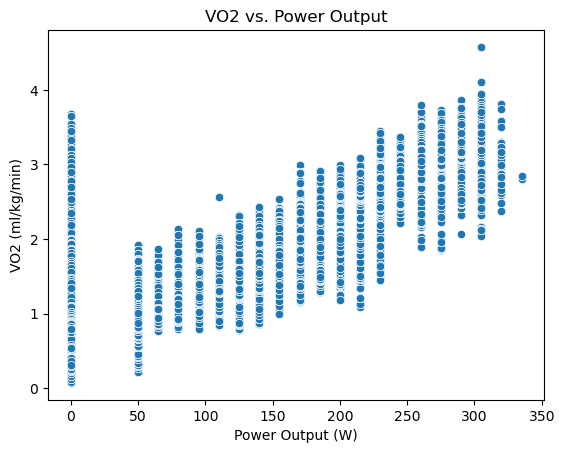

In [8]:

sns.scatterplot(x='power', y='VO2', data=data_Merged)
plt.title('VO2 vs. Power Output')
plt.xlabel('Power Output (W)')
plt.ylabel('VO2 (ml/kg/min)')
plt.show()

In [ ]:
2.HR analysis(HR pattern)

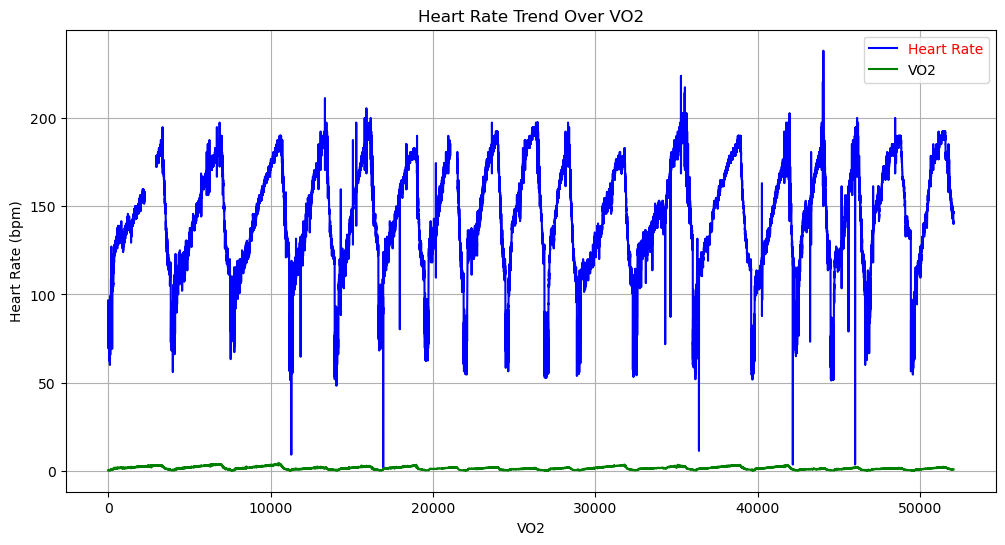

In [9]:
# Plot HR data
copy_data_merged_sheet = data_Merged.copy()
copy_data_merged_sheet['HR'] = 60 / (copy_data_merged_sheet['RR'] / 1000)

plt.figure(figsize=(12, 6))

plt.plot(copy_data_merged_sheet.index,copy_data_merged_sheet['HR'], label='Heart Rate', color='blue')
plt.plot( copy_data_merged_sheet['VO2'], label='VO2', color='green')
plt.title('Heart Rate Trend Over Time')

plt.title('Heart Rate Trend Over VO2')
plt.xlabel('VO2')
plt.ylabel('Heart Rate (bpm)')
legend = plt.legend()
legend.get_texts()[0].set_color("red") 
plt.grid(True)
plt.show()

In [ ]:
** 3.Taller or Weight person has better performance**

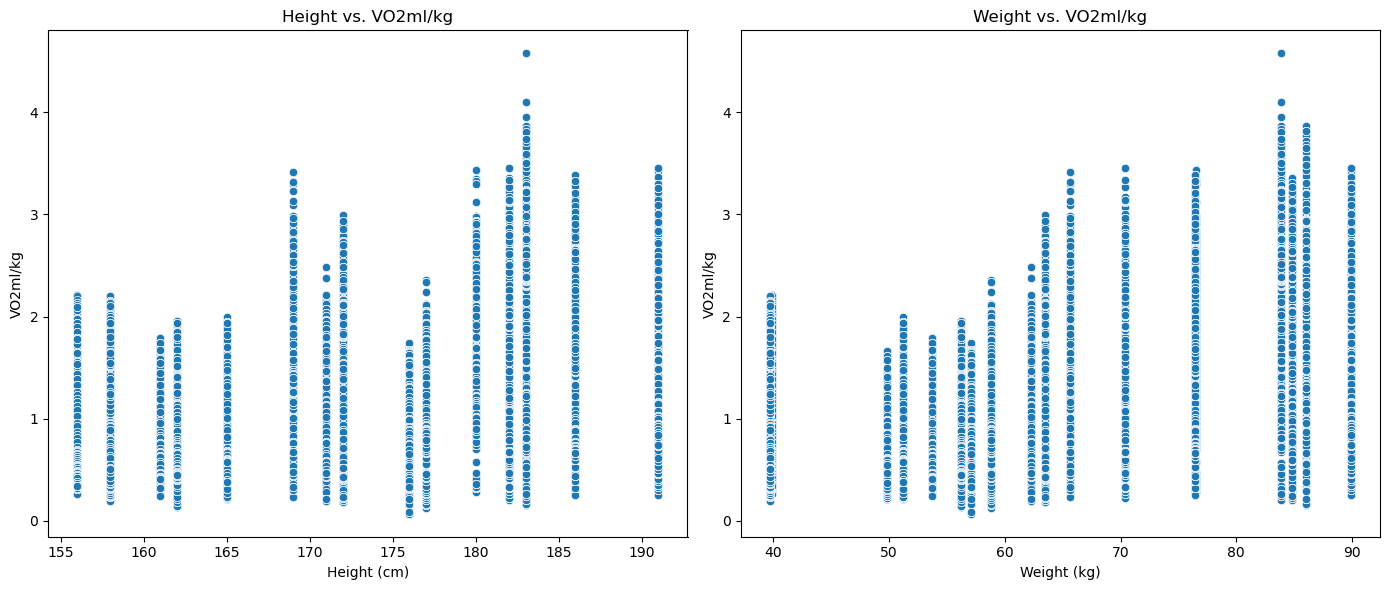

In [6]:

merged_data = pd.merge(data_Merged, data_Athletes, on='ID')

# Scatter plot for Height vs. VO2ml/kg
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=merged_data, x='Height', y='VO2')
plt.title('Height vs. VO2ml/kg')
plt.xlabel('Height (cm)')
plt.ylabel('VO2ml/kg')

# Scatter plot for Weight vs. VO2ml/kg
plt.subplot(1, 2, 2)
sns.scatterplot(data=merged_data, x='Weight', y='VO2')
plt.title('Weight vs. VO2ml/kg')
plt.xlabel('Weight (kg)')
plt.ylabel('VO2ml/kg')

plt.tight_layout()
plt.show()


